In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Data loading

In [3]:
path_to_file = "kddcup99_csv.csv"
data = pd.read_csv(path_to_file, index_col=False)
data

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


##Remove nan values

In [4]:
# Data Cleaning
# Checking for NULL values
print('Null values in dataset are',len(data[data.isnull().any(1)]))
print('='*40)

# Checkng for DUPLICATE values
data.drop_duplicates(keep='first', inplace = True)
data.dropna()
print("Read {} rows.".format(len(data)))
data

<ipython-input-4-9a7ec6205cea>:3: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  print('Null values in dataset are',len(data[data.isnull().any(1)]))


Null values in dataset are 0
Read 145585 rows.


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,label
0,0,tcp,http,SF,181,5450,0,0,0,0,...,9,1.0,0.0,0.11,0.00,0.00,0.00,0.0,0.0,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,19,1.0,0.0,0.05,0.00,0.00,0.00,0.0,0.0,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,29,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,39,1.0,0.0,0.03,0.00,0.00,0.00,0.0,0.0,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,49,1.0,0.0,0.02,0.00,0.00,0.00,0.0,0.0,normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494015,0,tcp,http,SF,310,1881,0,0,0,0,...,255,1.0,0.0,0.01,0.05,0.00,0.01,0.0,0.0,normal
494016,0,tcp,http,SF,282,2286,0,0,0,0,...,255,1.0,0.0,0.17,0.05,0.00,0.01,0.0,0.0,normal
494017,0,tcp,http,SF,203,1200,0,0,0,0,...,255,1.0,0.0,0.06,0.05,0.06,0.01,0.0,0.0,normal
494018,0,tcp,http,SF,291,1200,0,0,0,0,...,255,1.0,0.0,0.04,0.05,0.04,0.01,0.0,0.0,normal


##Dataset Analyze

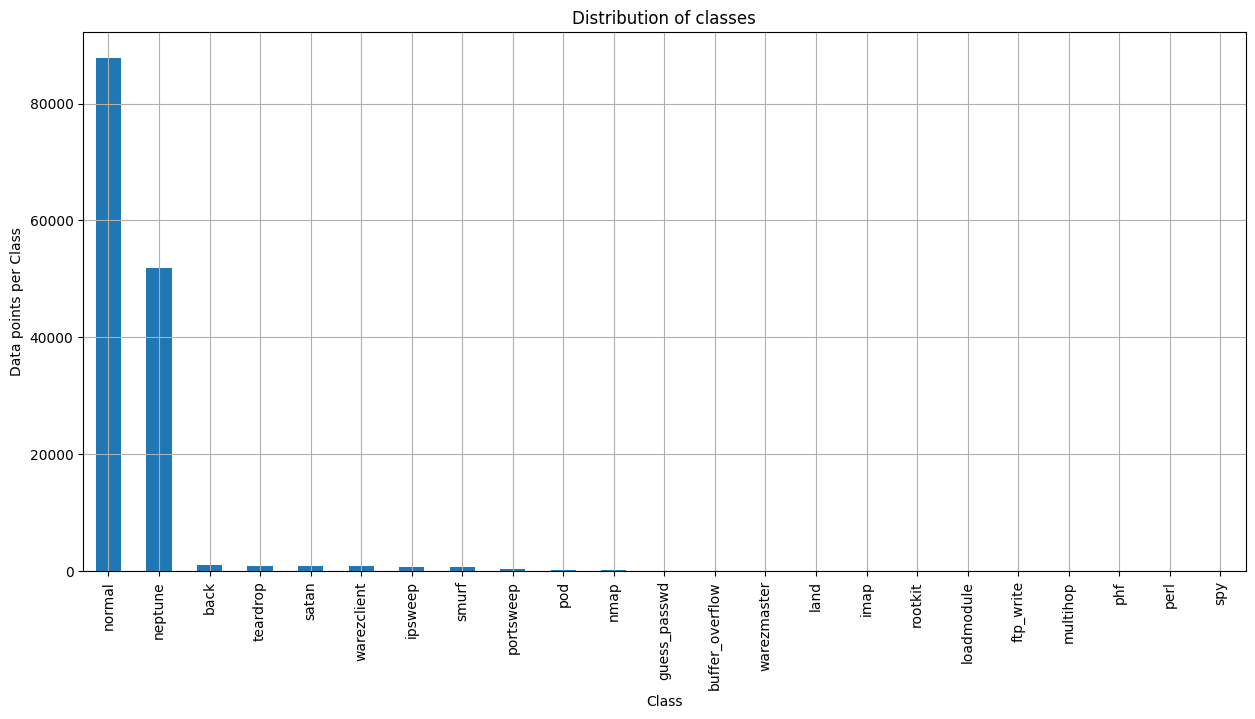

In [5]:
# Exploratory data analysis
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
class_distribution = data['label'].value_counts()
class_distribution.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Data points per Class')
plt.title('Distribution of classes')
plt.grid()
plt.show()

In [6]:
sorted_yi = np.argsort(-class_distribution.values)
for i in sorted_yi:
    print('Number of data per class', class_distribution.index[i],':', class_distribution.values[i],
          '(', np.round((class_distribution.values[i]/data.shape[0]*100), 3), '%)')

Number of data per class normal : 87831 ( 60.33 %)
Number of data per class neptune : 51820 ( 35.594 %)
Number of data per class back : 968 ( 0.665 %)
Number of data per class teardrop : 918 ( 0.631 %)
Number of data per class satan : 906 ( 0.622 %)
Number of data per class warezclient : 893 ( 0.613 %)
Number of data per class ipsweep : 651 ( 0.447 %)
Number of data per class smurf : 641 ( 0.44 %)
Number of data per class portsweep : 416 ( 0.286 %)
Number of data per class pod : 206 ( 0.141 %)
Number of data per class nmap : 158 ( 0.109 %)
Number of data per class guess_passwd : 53 ( 0.036 %)
Number of data per class buffer_overflow : 30 ( 0.021 %)
Number of data per class warezmaster : 20 ( 0.014 %)
Number of data per class land : 19 ( 0.013 %)
Number of data per class imap : 12 ( 0.008 %)
Number of data per class rootkit : 10 ( 0.007 %)
Number of data per class loadmodule : 9 ( 0.006 %)
Number of data per class ftp_write : 8 ( 0.005 %)
Number of data per class multihop : 7 ( 0.005 %)

In [7]:
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
lnum_compromised                 int64
lroot_shell                      int64
lsu_attempted                    int64
lnum_root                        int64
lnum_file_creations              int64
lnum_shells                      int64
lnum_access_files                int64
lnum_outbound_cmds               int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

### Dataset scaling and encoding object columns

In [8]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

numeric_columns = data.select_dtypes(include=['int64', 'float64'])
scaler = StandardScaler()

scaled_data = scaler.fit_transform(numeric_columns)
preprocesed_df = pd.DataFrame(scaled_data, columns=numeric_columns.columns)

label_encoder = LabelEncoder()
preprocesed_df['protocol_type'] = label_encoder.fit_transform(data['protocol_type'])
preprocesed_df['service'] = label_encoder.fit_transform(data['service'])
preprocesed_df['flag'] = label_encoder.fit_transform(data['flag'])
preprocesed_df['label_encoded'] = label_encoder.fit_transform(data['label'])
preprocesed_df['label'] = data['label']

preprocesed_df['IsBenign'] = (preprocesed_df['label'] == 'normal').astype(int)

In [9]:
preprocesed_df.dropna()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,protocol_type,service,flag,label_encoded,label,IsBenign
0,-0.107851,-0.004293,0.042595,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017175,-0.007905,...,-0.644431,-0.641708,-0.360879,-0.353942,1,22,9,11,normal,1
1,-0.107851,-0.004261,-0.039036,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017175,-0.007905,...,-0.644431,-0.641708,-0.360879,-0.353942,1,22,9,11,normal,1
2,-0.107851,-0.004263,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017175,-0.007905,...,-0.644431,-0.641708,-0.360879,-0.353942,1,22,9,11,normal,1
3,-0.107851,-0.004272,-0.025042,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017175,-0.007905,...,-0.644431,-0.641708,-0.360879,-0.353942,1,22,9,11,normal,1
4,-0.107851,-0.004273,-0.013613,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017175,-0.007905,...,-0.644431,-0.641708,-0.360879,-0.353942,1,22,9,11,normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145534,-0.107851,-0.004230,-0.040352,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017175,-0.007905,...,-0.644431,-0.641708,-0.360879,-0.353942,1,22,9,11,normal,1
145537,-0.107851,-0.004217,-0.039053,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017175,-0.007905,...,-0.644431,-0.641708,-0.360879,-0.353942,1,22,9,11,normal,1
145544,-0.107851,-0.004212,-0.041700,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017175,-0.007905,...,-0.644431,-0.641708,-0.360879,-0.353942,1,22,9,11,normal,1
145555,-0.107851,-0.004230,-0.036882,-0.011722,-0.084394,-0.004737,-0.07021,-0.018022,1.017175,-0.007905,...,-0.644431,-0.641708,-0.360879,-0.353942,1,22,9,11,normal,1


## Сheck feature importance

[LightGBM] [Info] Number of positive: 66253, number of negative: 79332
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.028551 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2976
[LightGBM] [Info] Number of data points in the train set: 145585, number of used features: 37
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.455081 -> initscore=-0.180161
[LightGBM] [Info] Start training from score -0.180161


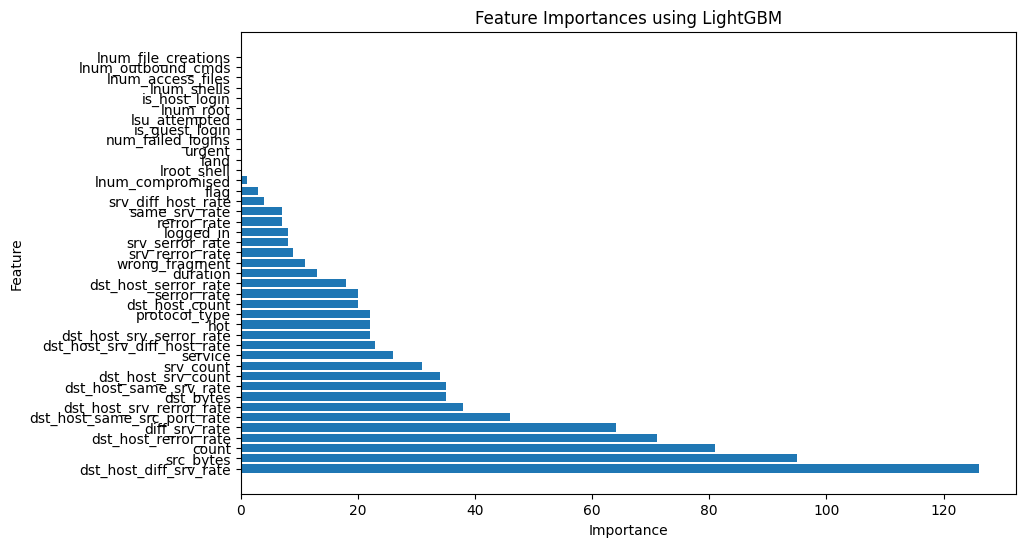

In [10]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt
X, Y, = preprocesed_df.drop(columns=['label', 'label_encoded', 'IsBenign']), preprocesed_df['IsBenign']
train_data = lgb.Dataset(X, label=Y)
params = {
    'objective': 'binary',
    'metric': 'binary_logloss',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.05,
    'feature_fraction': 0.9
}

num_round = 30  # Кількість ітерацій
bst = lgb.train(params, train_data, num_round)
feature_importances = bst.feature_importance(importance_type='split')
feature_importance_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances using LightGBM')
plt.show()

In [11]:
feature_importance_df

,feature,importance
31,dst_host_diff_srv_rate,126
1,src_bytes,95
19,count,81
36,dst_host_rerror_rate,71
26,diff_srv_rate,64
32,dst_host_same_src_port_rate,46
37,dst_host_srv_rerror_rate,38
2,dst_bytes,35
30,dst_host_same_srv_rate,35
29,dst_host_srv_count,34


In [78]:
#Drop all unnecessary features
feature_nonimportant = feature_importance_df[feature_importance_df['importance'] == 0]['feature'].values
print(feature_nonimportant)
imporatnt_feature_df = preprocesed_df.drop(columns=feature_nonimportant)

['service' 'dst_host_srv_diff_host_rate' 'dst_host_srv_serror_rate' 'hot'
 'protocol_type' 'dst_host_count' 'serror_rate' 'dst_host_serror_rate'
 'duration' 'wrong_fragment' 'srv_rerror_rate' 'srv_serror_rate'
 'logged_in' 'rerror_rate' 'same_srv_rate' 'srv_diff_host_rate' 'flag'
 'lnum_compromised' 'lroot_shell' 'land' 'urgent' 'num_failed_logins'
 'is_guest_login' 'lsu_attempted' 'lnum_root' 'is_host_login'
 'lnum_shells' 'lnum_access_files' 'lnum_outbound_cmds'
 'lnum_file_creations']


In [13]:
%pip install imblearn

In [80]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

imporatnt_feature_df.dropna(inplace=True)

train_data, test_data = train_test_split(imporatnt_feature_df, test_size=0.1, random_state=42)
train_data, val_data = train_test_split(train_data, test_size=0.2, random_state=42)

X_train, y_train = train_data.drop(columns=['label', 'label_encoded', 'IsBenign']), train_data['IsBenign']
X_test, y_test = test_data.drop(columns=['label', 'label_encoded', 'IsBenign']), test_data['IsBenign']
X_val, y_val = val_data.drop(columns=['label', 'label_encoded', 'IsBenign']), val_data['IsBenign']

smote = SMOTE(random_state=42)

#Fix imbalanced data
X_train, y_train = smote.fit_resample(X, y)

#SVM binary classifier to clasify if trafic is not benign

In [ ]:
#create one class model to check if traffic is benign with rbg kernel
import time
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='linear')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred)

#Cross validation and Greadsearch

In [82]:
print(acc)

0.7734492753623189


In [17]:
# from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')

In [18]:
# Plot the distribution of accuracy scores
print(cv_scores)

[0.77117552 0.77077295 0.77147919 0.77107658 0.77107658]


In [26]:
len(train_data['IsBenign'] == 0)

62097

In [19]:
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf'],
    'gamma': ['auto', 0.1, 1],
}

svm = SVC()
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid)  # 5-fold cross-validation
grid_search.fit(X_train, y_train)

print("Best Hyperparameters: ", grid_search.best_params_)
print("Best Cross-Validation Score: {:.2f}".format(grid_search.best_score_))

Best Hyperparameters:  {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
Best Cross-Validation Score: 0.79


#SVM multiclass model

In [75]:
X_train_MC, y_train_MC = train_data.drop(columns=['label', 'label_encoded', 'IsBenign']), train_data['label_encoded']
X_test_MC, y_test_MC = test_data.drop(columns=['label', 'label_encoded', 'IsBenign']), test_data['label_encoded']
X_val_MC, y_val_MC = val_data.drop(columns=['label', 'label_encoded', 'IsBenign']), val_data['label_encoded']

svm_multi = SVC(kernel='rbf')
start = time.time()
svm_multi.fit(X_train_MC, y_train_MC)
stop = time.time()

print(f"Training time: {stop - start}s")


Training time: 19.09500741958618s


In [76]:
y_pred_mc = svm_multi.predict(X_test_MC)
acc = accuracy_score(y_test_MC, y_pred_mc)

In [77]:
print(acc)
from sklearn.metrics import classification_report
report = classification_report(y_test_MC, y_pred_mc)

0.9798260869565217


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Test Sequential model

In [51]:
import pandas as pd
import io
import requests
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn import metrics
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping


# Convert to numpy - Classification
x_columns = imporatnt_feature_df.drop(columns=['label', 'label_encoded', 'IsBenign']).columns
x = imporatnt_feature_df[x_columns].values
dummies = pd.get_dummies(imporatnt_feature_df['label_encoded']) # Classification
outcomes = dummies.columns
num_classes = len(outcomes)
y = dummies.values

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# Create neural net
model = Sequential()
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(50, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(10, input_dim=x.shape[1], kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal'))
model.add(Dense(y.shape[1],activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, patience=5, verbose=1, mode='auto')
model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[monitor],verbose=2,epochs=19)

Epoch 1/19
2022/2022 - 8s - loss: 0.6467 - val_loss: 0.3263 - 8s/epoch - 4ms/step
Epoch 2/19
2022/2022 - 5s - loss: 0.2752 - val_loss: 0.2411 - 5s/epoch - 2ms/step
Epoch 3/19
2022/2022 - 5s - loss: 0.2241 - val_loss: 0.2077 - 5s/epoch - 2ms/step
Epoch 4/19
2022/2022 - 6s - loss: 0.1998 - val_loss: 0.1865 - 6s/epoch - 3ms/step
Epoch 5/19
2022/2022 - 4s - loss: 0.1808 - val_loss: 0.1863 - 4s/epoch - 2ms/step
Epoch 6/19
2022/2022 - 7s - loss: 0.1662 - val_loss: 0.1663 - 7s/epoch - 3ms/step
Epoch 7/19
2022/2022 - 5s - loss: 0.1587 - val_loss: 0.1599 - 5s/epoch - 2ms/step
Epoch 8/19
2022/2022 - 4s - loss: 0.1519 - val_loss: 0.1575 - 4s/epoch - 2ms/step
Epoch 9/19
2022/2022 - 6s - loss: 0.1459 - val_loss: 0.1487 - 6s/epoch - 3ms/step
Epoch 10/19
2022/2022 - 4s - loss: 0.1409 - val_loss: 0.1494 - 4s/epoch - 2ms/step
Epoch 11/19
2022/2022 - 4s - loss: 0.1379 - val_loss: 0.1416 - 4s/epoch - 2ms/step
Epoch 12/19
2022/2022 - 7s - loss: 0.1344 - val_loss: 0.1478 - 7s/epoch - 3ms/step
Epoch 13/19
2

In [52]:
import tensorflow.keras.backend as K
print('Learning Rate - ')
print(K.eval(model.optimizer.lr))
print('='*50)
model.summary()

Learning Rate - 
0.001
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 10)                300       
                                                                 
 dense_13 (Dense)            (None, 50)                550       
                                                                 
 dense_14 (Dense)            (None, 10)                510       
                                                                 
 dense_15 (Dense)            (None, 1)                 11        
                                                                 
 dense_16 (Dense)            (None, 23)                46        
                                                                 
Total params: 1417 (5.54 KB)
Trainable params: 1417 (5.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________

In [72]:
print('Train data')
print(x_train.shape)
print(y_train.shape)
print('='*20)
print('Test data')
print(x_test.shape)
print(y_test.shape)
print('='*20)

# Measure accuracy
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score
print('Predicting on the test data:')
escore = model.evaluate(x_test, y_test, batch_size=32)
pred = model.predict(x_test)
pred = np.argmax(pred,axis=1)
y_eval = np.argmax(y_test,axis=1)

print(classification_report(label_encoder.inverse_transform(y_eval), label_encoder.inverse_transform(pred)))

Train data
(64685, 29)
(64685, 23)
Test data
(21562, 29)
(21562, 23)
Predicting on the test data:
674/674 [==============================] - 2s 2ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 precision    recall  f1-score   support

           back       0.76      0.98      0.86       249
buffer_overflow       0.00      0.00      0.00         4
      ftp_write       0.00      0.00      0.00         3
   guess_passwd       0.00      0.00      0.00        10
           imap       0.00      0.00      0.00         2
        ipsweep       0.60      0.80      0.69       145
           land       0.00      0.00      0.00         4
       multihop       0.00      0.00      0.00         1
        neptune       0.96      1.00      0.98      3762
           nmap       0.00      0.00      0.00        36
         normal       1.00      1.00      1.00     16603
            phf       0.00      0.00      0.00         1
            pod       0.00      0.00      0.00        26
      portsweep       0.00      0.00      0.00        74
        rootkit       0.00      0.00      0.00         1
          satan       0.73      0.84      0.78       188
          smurf       0.87    

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Multiclass SVM model with linear kernel

In [59]:
svm_multi = SVC(kernel='linear')
start = time.time()
svm_multi.fit(X_train_MC, y_train_MC)
stop = time.time()

print(f"Training time: {stop - start}s")

Training time: 21.439061164855957s


In [73]:
y_pred_mc = svm_multi.predict(X_test_MC)
acc = accuracy_score(y_test_MC, y_pred_mc)
print(acc)
from sklearn.metrics import classification_report
print(classification_report(label_encoder.inverse_transform(y_test_MC), label_encoder.inverse_transform(y_pred_mc)))

0.9971014492753624
                 precision    recall  f1-score   support

           back       1.00      0.99      0.99        95
buffer_overflow       0.67      0.67      0.67         3
      ftp_write       0.00      0.00      0.00         1
   guess_passwd       0.80      1.00      0.89         4
           imap       0.00      0.00      0.00         2
        ipsweep       0.96      0.99      0.97        69
           land       1.00      1.00      1.00         1
        neptune       1.00      1.00      1.00      1504
           nmap       1.00      1.00      1.00        13
         normal       1.00      1.00      1.00      6650
            pod       1.00      1.00      1.00         8
      portsweep       1.00      0.97      0.98        29
        rootkit       0.00      0.00      0.00         1
          satan       1.00      0.97      0.98        67
          smurf       1.00      1.00      1.00        37
       teardrop       1.00      1.00      1.00        51
    warezcl

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
